In [1]:
"""
 Import statements
"""

import hipopy.hipopy # <--- Package for reading in the hipo files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import ROOT
import timeit

# Set LaTeX font for Matplotlib
rc('text', usetex=True)


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-74invfzv because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Welcome to JupyROOT 6.22/06


---

Loading the hipo file using `hipopy`


In [2]:
filename = "/cache/clas12/rg-a/production/recon/fall2018/torus-1/pass1/v1/dst/train/nSidis/nSidis_005032.hipo"

hipo_file = hipopy.hipopy.open(filename,mode='r')

# Read the REC::Particle and REC::Traj banks
hipo_file.readBank('REC::Particle')
hipo_file.readBank('REC::Traj')

# Showing the data types inside each bank
print("REC::Particle data","\n"+100*"=")
display(hipo_file.getNamesAndTypes('REC::Particle'))
print(100*"=","\nREC::Traj data","\n"+100*"=")
display(hipo_file.getNamesAndTypes('REC::Traj'))

REC::Particle data 


{'pid': 'I',
 'px': 'F',
 'py': 'F',
 'pz': 'F',
 'vx': 'F',
 'vy': 'F',
 'vz': 'F',
 'vt': 'F',
 'charge': 'B',
 'beta': 'F',
 'chi2pid': 'F',
 'status': 'S'}

REC::Traj data 


{'pindex': 'S',
 'index': 'S',
 'detector': 'B',
 'layer': 'B',
 'x': 'F',
 'y': 'F',
 'z': 'F',
 'cx': 'F',
 'cy': 'F',
 'cz': 'F',
 'path': 'F'}

compression type = 0 data length = 157529


In [3]:
Mproton = 0.938272 # proton mass, GeV
Me = 0.000511 # electron mass, GeV
Mpion = 0.139570 # pion- mass, GeV
beamE = 10.6041 # electron beam energy for Fall2018 RG-A, GeV

In [12]:
px = []
py = []
pz = []
p = []
vx = []
vy = []
vz = []

pion_theta = []
pion_phi = []

# there are 306323 events in this hipo file
# since 306323 events would take a while, we limit it to Nevents
Nevents = 50000

start_time = timeit.default_timer()

for i,_ in enumerate(hipo_file):
    
    # Exit loop after "Nevents" have been analyzed
    if(i>Nevents):
        break
        
    # getting all px, py. and pz into a single 1D list to make it easy to work with
    px_temporary = hipo_file.getFloats("REC::Particle", "px") # Use getFloats because the "px" datatype is "F" , see first cell output after imports
    py_temporary = hipo_file.getFloats("REC::Particle", "py") 
    pz_temporary = hipo_file.getFloats("REC::Particle", "pz")

    # doing the same for vx, vy, and vz
    vx_temporary = hipo_file.getFloats("REC::Particle", "vx") 
    vy_temporary = hipo_file.getFloats("REC::Particle", "vy")
    vz_temporary = hipo_file.getFloats("REC::Particle", "vz")
        
    
    # finding particle ids for the event
    pid_temporary = hipo_file.getInts("REC::Particle", "pid")
    
    for j,_ in enumerate(pid_temporary):
 
        # looking for pions
        if (pid_temporary[j] == -211):
            
            px.append(px_temporary[j])
            py.append(py_temporary[j])
            pz.append(pz_temporary[j])

            vx.append(vx_temporary[j])
            vy.append(vy_temporary[j])
            vz.append(vz_temporary[j])
            
            pion_vector = ROOT.TLorentzVector()
            pion_vector.SetXYZM(px_temporary[j], py_temporary[j], pz_temporary[j], Mpion)
            pion_theta.append(pion_vector.Theta() *180/np.pi) # append calculated azimuthal angle in degrees
            pion_phi.append(pion_vector.Phi() *180/np.pi) # append calculated polar angle in degrees
            p.append(pion_vector.P()) # append total momentum
            
            

elapsed = timeit.default_timer() - start_time
elapsed

193.54960004985332

In [5]:
px = np.array(px)
py = np.array(py)
pz = np.array(pz)
p = np.array(p)

vx = np.array(vx)
vy = np.array(vy)
vz = np.array(vz)
pion_theta = np.array(pion_theta)
pion_phi = np.array(pion_phi)


print(type(px))

<class 'numpy.ndarray'>


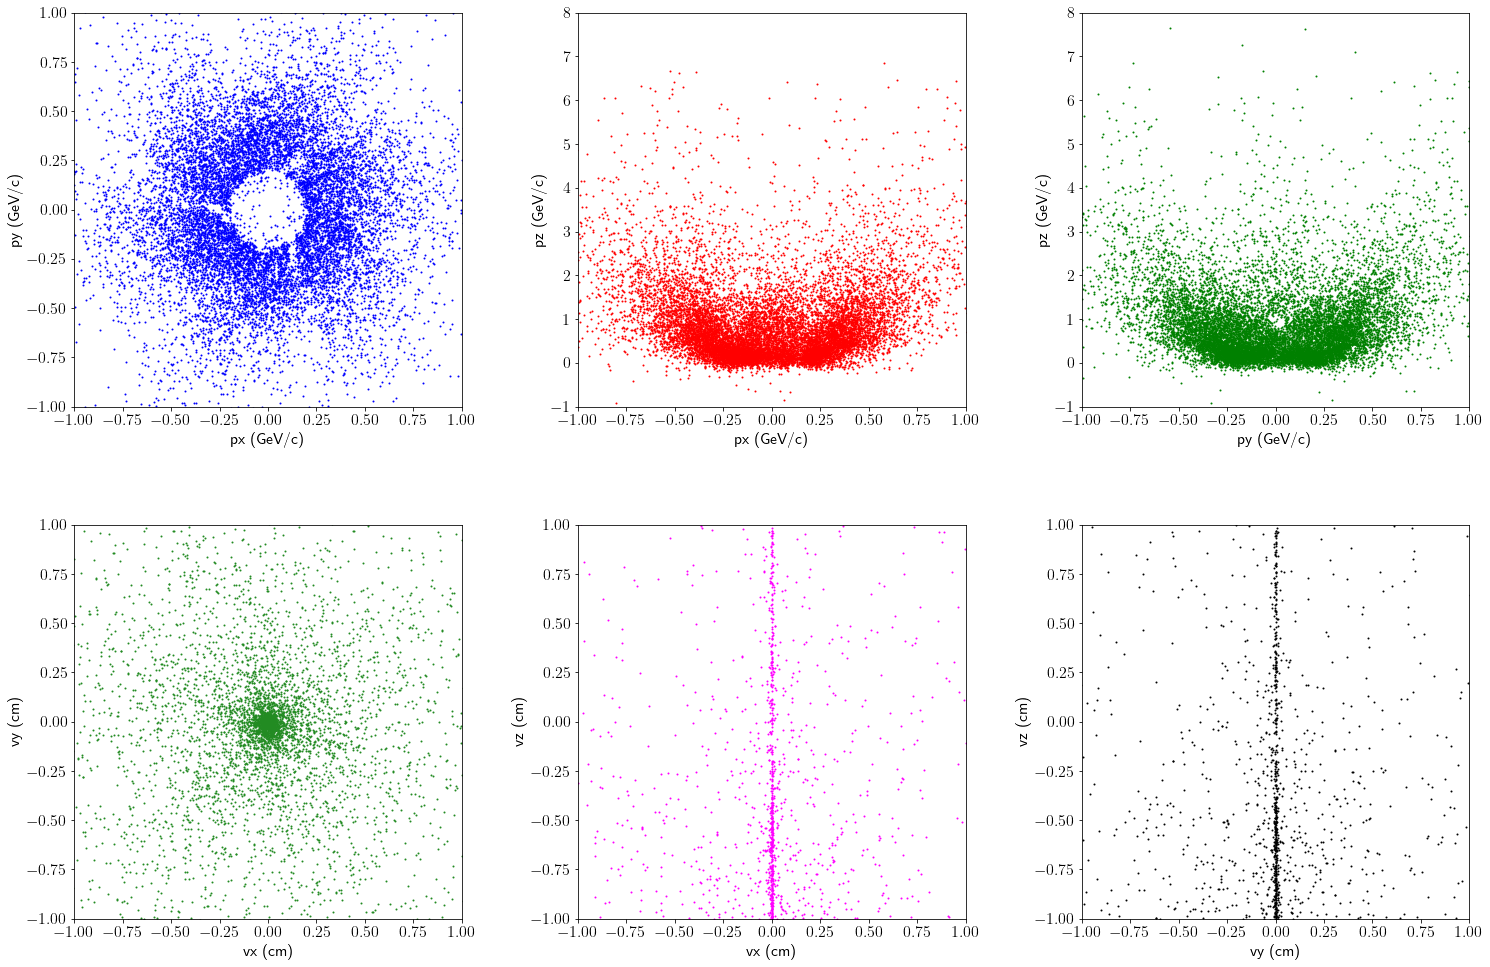

In [6]:
plt.rcParams['font.size'] = 16

# Create a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(25, 25*2/3))

# Adjust spacing
fig.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

p_axis_limit = 1
p_marker_size = 1

# 0,0
axs[0,0].scatter(px, py, s=p_marker_size, c="blue")
axs[0,0].set_xlabel(r"px (GeV/c)")
axs[0,0].set_ylabel(r"py (GeV/c)")

axs[0,0].set_xlim([-p_axis_limit, p_axis_limit])
axs[0,0].set_ylim([-p_axis_limit, p_axis_limit])

# 0,1
axs[0,1].scatter(px, pz, s=p_marker_size, c="red")
axs[0,1].set_xlabel(r"px (GeV/c)")
axs[0,1].set_ylabel(r"pz (GeV/c)")

axs[0,1].set_xlim([-p_axis_limit, p_axis_limit])
axs[0,1].set_ylim([-p_axis_limit, 8])

# 0,2
axs[0,2].scatter(py, pz, s=p_marker_size, c="green")
axs[0,2].set_xlabel(r"py (GeV/c)")
axs[0,2].set_ylabel(r"pz (GeV/c)")

axs[0,2].set_xlim([-p_axis_limit, p_axis_limit])
axs[0,2].set_ylim([-p_axis_limit, 8])



v_axis_limit = 1
v_marker_size = 1

# 1,0
axs[1,0].scatter(vx, vy, s=v_marker_size, c="forestgreen")
axs[1,0].set_xlabel(r"vx (cm)")
axs[1,0].set_ylabel(r"vy (cm)")

axs[1,0].set_xlim([-v_axis_limit, v_axis_limit])
axs[1,0].set_ylim([-v_axis_limit, v_axis_limit])

# 1,1
axs[1,1].scatter(vx, vz, s=v_marker_size, c="magenta")
axs[1,1].set_xlabel(r"vx (cm)")
axs[1,1].set_ylabel(r"vz (cm)")

axs[1,1].set_xlim([-v_axis_limit, v_axis_limit])
axs[1,1].set_ylim([-v_axis_limit, v_axis_limit])

# 1,2
axs[1,2].scatter(vy, vz, s=v_marker_size, c="black")
axs[1,2].set_xlabel(r"vy (cm)")
axs[1,2].set_ylabel(r"vz (cm)")

axs[1,2].set_xlim([-v_axis_limit, v_axis_limit])
axs[1,2].set_ylim([-v_axis_limit, v_axis_limit])

plt.show()


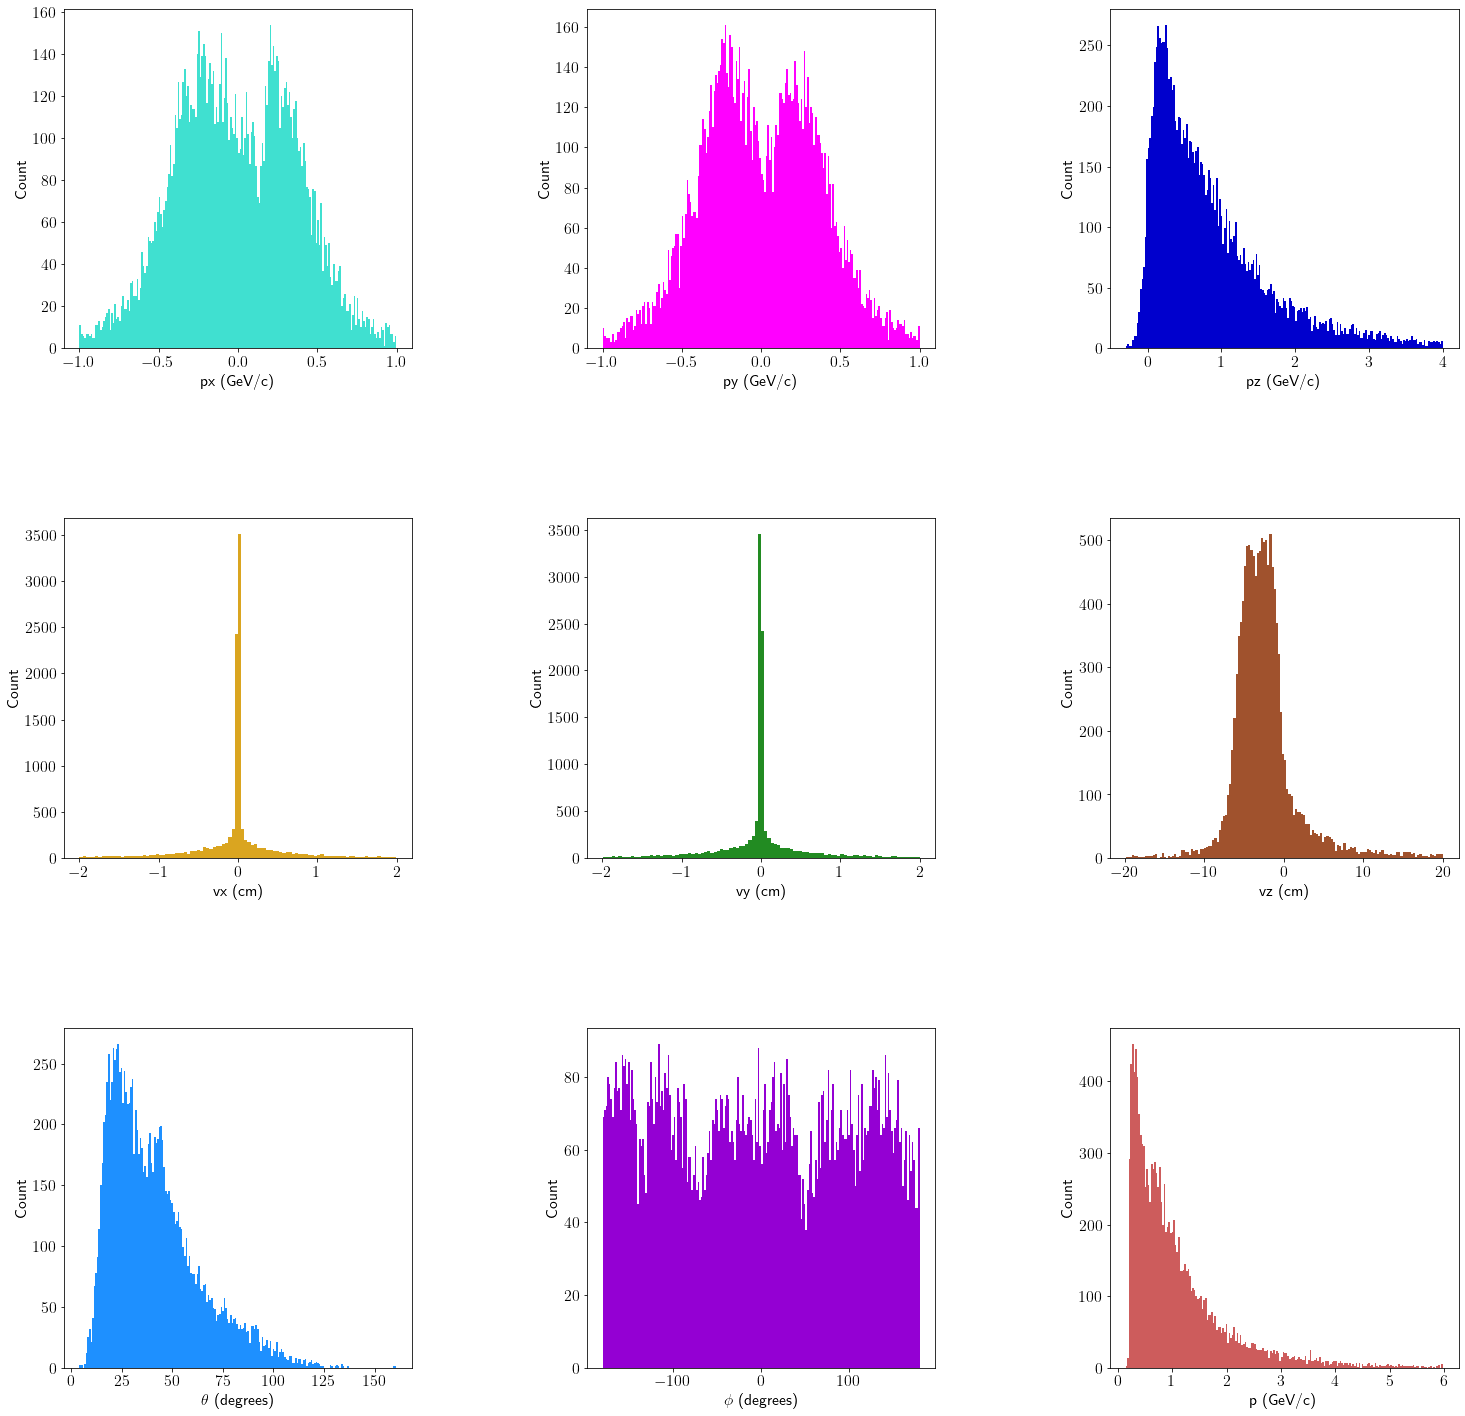

In [7]:
nbins = 200

# Create a grid of subplots
fig1, axs1 = plt.subplots(3, 3, figsize=(25, 25))

# Adjust spacing
fig1.subplots_adjust(hspace=0.5)
fig1.subplots_adjust(wspace=0.5)

# p histograms

axs1[0,0].hist(px[abs(px) <= 1], bins=nbins, color="turquoise")
axs1[0,0].set_ylabel("Count")
axs1[0,0].set_xlabel(r"px (GeV/c)")

axs1[0,1].hist(py[abs(py) <= 1], bins=nbins, color="fuchsia")
axs1[0,1].set_ylabel("Count")
axs1[0,1].set_xlabel(r"py (GeV/c)")

axs1[0,2].hist(pz[np.logical_and(pz > -0.3, pz < 4)], bins=nbins, color="mediumblue")
axs1[0,2].set_ylabel("Count")
axs1[0,2].set_xlabel(r"pz (GeV/c)")


# v histograms
vbins = 100

axs1[1,0].hist(vx[abs(vx) <= 2], bins=vbins, color="goldenrod")
axs1[1,0].set_ylabel("Count")
axs1[1,0].set_xlabel(r"vx (cm)")

axs1[1,1].hist(vy[abs(vy) <= 2], bins=vbins, color="forestgreen")
axs1[1,1].set_ylabel("Count")
axs1[1,1].set_xlabel(r"vy (cm)")

axs1[1,2].hist(vz[abs(vz) <= 20], bins=150, color="sienna")
axs1[1,2].set_ylabel("Count")
axs1[1,2].set_xlabel(r"vz (cm)")

# angle histograms and total momentum
axs1[2,0].hist(pion_theta, bins=200, color="dodgerblue")
axs1[2,0].set_ylabel("Count")
axs1[2,0].set_xlabel(r"$\theta$ (degrees)")

axs1[2,1].hist(pion_phi, bins=200, color="darkviolet")
axs1[2,1].set_ylabel("Count")
axs1[2,1].set_xlabel(r"$\phi$ (degrees)")

axs1[2,2].hist(p[p < 6], bins=200, color="indianred")
axs1[2,2].set_ylabel("Count")
axs1[2,2].set_xlabel(r"p (GeV/c)")

plt.show()

In [8]:
print(np.sort(p)[:10])

[0.14056246 0.16712062 0.1714886  0.17474809 0.1773808  0.18550463
 0.18567897 0.18682765 0.19598299 0.19744342]


In [9]:
plt.savefig('fig.png')
plt.savefig('fig1.png')

<Figure size 432x288 with 0 Axes>

In [10]:
num_pions = len(p)
num_pions

13304

In [11]:
np.set_printoptions(suppress=True)
px_sorted = np.sort(px)
print(px_sorted[:10])
print(px_sorted[-10:])

[-150285.140625       -28.6222496      -23.30864334     -22.45648575
     -18.42705727     -17.13527298     -13.07655811     -12.61877251
     -10.6696167       -9.8371954 ]
[ 4.62745667  4.91972208  5.05782986  6.5701189   7.69667006  8.12304115
 11.81068802 12.63217354 33.6899147  71.82588959]
